In [9]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from pathlib import Path
import pingouin as pg
import matplotlib.pyplot as plt

In [3]:
cats = pd.read_csv(Path.cwd() / 'data' / 'cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [4]:
# null hypo → following to normal distributions
ss.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [5]:
mu = 2.6
# null hypo → following mu
ss.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [8]:
ss.ttest_1samp(cats['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723617)

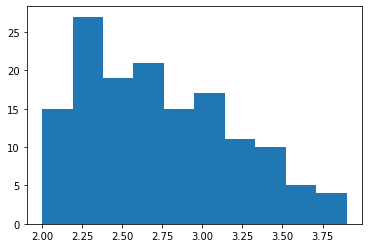

In [11]:
plt.hist(cats['Bwt'])
plt.show()

In [17]:
ss.ttest_1samp(ss.uniform(-1, 1).rvs(100), popmean=0, alternative='two-sided')

Ttest_1sampResult(statistic=-16.832690616041912, pvalue=8.304561322217225e-31)

In [27]:
uni_list = [ss.uniform(0, 1).rvs(100).mean().round(3) for _ in range(1000)]
np.array(uni_list)

array([0.529, 0.513, 0.493, 0.535, 0.524, 0.475, 0.541, 0.492, 0.55 ,
       0.477, 0.514, 0.498, 0.445, 0.553, 0.519, 0.53 , 0.483, 0.515,
       0.518, 0.567, 0.516, 0.493, 0.494, 0.516, 0.502, 0.5  , 0.534,
       0.532, 0.512, 0.526, 0.514, 0.491, 0.497, 0.515, 0.514, 0.48 ,
       0.443, 0.508, 0.528, 0.5  , 0.476, 0.524, 0.546, 0.52 , 0.47 ,
       0.456, 0.517, 0.458, 0.547, 0.5  , 0.524, 0.527, 0.488, 0.531,
       0.516, 0.504, 0.424, 0.523, 0.512, 0.548, 0.495, 0.463, 0.537,
       0.512, 0.449, 0.551, 0.509, 0.513, 0.479, 0.495, 0.509, 0.528,
       0.461, 0.477, 0.469, 0.471, 0.494, 0.521, 0.556, 0.474, 0.51 ,
       0.466, 0.523, 0.509, 0.519, 0.504, 0.517, 0.479, 0.48 , 0.48 ,
       0.511, 0.447, 0.492, 0.485, 0.49 , 0.502, 0.506, 0.52 , 0.521,
       0.495, 0.48 , 0.519, 0.545, 0.51 , 0.518, 0.527, 0.5  , 0.472,
       0.493, 0.539, 0.5  , 0.498, 0.511, 0.475, 0.486, 0.52 , 0.49 ,
       0.529, 0.528, 0.546, 0.525, 0.514, 0.553, 0.481, 0.532, 0.489,
       0.51 , 0.55 ,

(array([ 1.,  1.,  1.,  1., 10., 14., 20., 15., 25., 34., 46., 47., 56.,
        53., 68., 68., 87., 50., 87., 68., 54., 50., 50., 32., 26., 15.,
        10.,  3.,  6.,  2.]),
 array([0.411 , 0.4165, 0.422 , 0.4275, 0.433 , 0.4385, 0.444 , 0.4495,
        0.455 , 0.4605, 0.466 , 0.4715, 0.477 , 0.4825, 0.488 , 0.4935,
        0.499 , 0.5045, 0.51  , 0.5155, 0.521 , 0.5265, 0.532 , 0.5375,
        0.543 , 0.5485, 0.554 , 0.5595, 0.565 , 0.5705, 0.576 ]),
 <BarContainer object of 30 artists>)

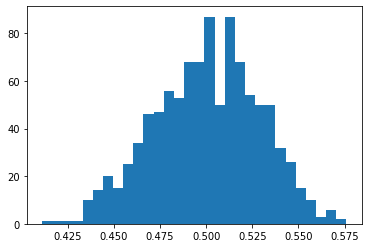

In [28]:
plt.hist(np.array(uni_list), bins=30)

In [30]:
uni_list_mean = np.array(uni_list).mean()
uni_list_mean

0.500347

In [32]:
ss.ttest_1samp(uni_list, popmean=0.5, alternative='two-sided')

Ttest_1sampResult(statistic=0.3850252457378232, pvalue=0.700300668294232)